In [1]:
# numpy , pandas
import numpy as np 
import pandas as pd
# tensorflow
import tensorflow as tf
from tensorflow import keras

# 可視化用ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#pandasのカラムが100列まで見れるようにする
pd.set_option('display.max_columns', 100)
import os
from google.colab import drive
drive.mount('/content/drive/')
print(os.listdir(os.getcwd()))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['.config', 'drive', 'sample_data']


In [2]:
%cd "/content/drive/My Drive/Colab Notebooks/paizaSkillAndSalary"

/content/drive/My Drive/Colab Notebooks/paizaSkillAndSalary


In [3]:
#df = pd.read_csv('./paizaSkillSetAndSalary.csv',index_col=[0])
# 学習データの読み込み
df = pd.read_csv('./paizaSkillSetAndSalary.csv',index_col=[0])
df.head()
df = df.drop(columns=['corpname','occupation','salary'])
np.asarray(df).astype(np.float32)
train,test = train_test_split(df,test_size=0.2)
train_data = train.drop(columns=['estimatedSalary'])
train_labels = train['estimatedSalary']
test_data = test.drop(columns=['estimatedSalary'])
test_labels = test['estimatedSalary']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


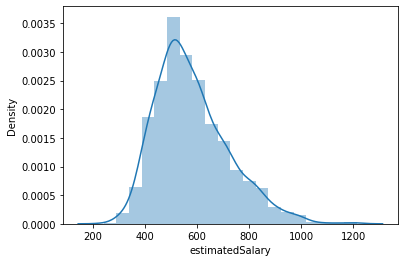

In [4]:
sns.distplot(train['estimatedSalary'],bins=20)

In [5]:
print("Training set:{}".format(train_data.shape))
print("Testing set:{}".format(test_data.shape))
train.head()

Training set:(1520, 274)
Testing set:(380, 274)


,estimatedSalary,東京都,宮城県,京都府,北海道,大阪府,神奈川県,愛知県,沖縄県,茨城県,福岡県,埼玉県,広島県,滋賀県,愛媛県,福井県,兵庫県,岡山県,和歌山県,香川県,山口県,静岡県,群馬県,石川県,佐賀県,千葉県,秋田県,熊本県,大分県,福島県,徳島県,長崎県,島根県,長野県,JavaScript,PHP,Ruby,Python2,Python3,Go言語,C,Spring,Laravel,React,Vue.js,Java,Visual Basic(VB.NET),HTML+CSS,SQL,Kotlin,...,nessesary-Sass,nessesary-Unity,nessesary-機械学習,nessesary-Rust,nessesary-チームの指針策定と牽引,nessesary-予実管理,nessesary-セキュリティソフトウェア開発,nessesary-テスト,nessesary-保守、追加開発,nessesary-B2C,nessesary-Bash,nessesary-WEBサイト、CMS,nessesary-COBOL,nessesary-ソーシャルゲーム,nessesary-Lua,nessesary-Groovy,nessesary-UnrealEngine,nessesary-オンラインゲーム,nessesary-SaaS,nessesary-金融/保険,nessesary-スマートフォンアプリ,nessesary-jQuery,nessesary-新規開発の企画,nessesary-PL/SQL,nessesary-Django,nessesary-ReactNative,nessesary-受託開発,nessesary-Next.js,nessesary-Nuxt.js,nessesary-大規模,nessesary-Angular,nessesary-ハードウェア制御,nessesary-組込み,nessesary-DirectX,nessesary-OpenGL,nessesary-R言語,nessesary-Struts,nessesary-ポータルサイト,nessesary-AI,nessesary-JavaEE,nessesary-ミドルウェア,nessesary-CakePHP,nessesary-OS,nessesary-ミドルウェア開発,nessesary-ABAP,nessesary-ActionScript,nessesary-Haml,nessesary-iOSSDK,nessesary-Win/Macアプリケーション,rank
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
https://paiza.jp/career/job_offers/12348?from=list,550.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
https://paiza.jp/career/job_offers/458?from=list,550.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
https://paiza.jp/career/job_offers/9384?from=list,650.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
https://paiza.jp/career/job_offers/11308?from=list,500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
https://paiza.jp/career/job_offers/11943?from=list,600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [6]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])
 
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
 
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                17600     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21,825
Trainable params: 21,825
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
 
EPOCHS = 20
 
# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................

loss
mae
val_loss
val_mae


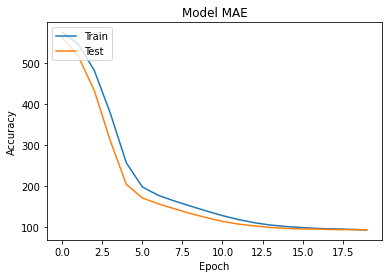

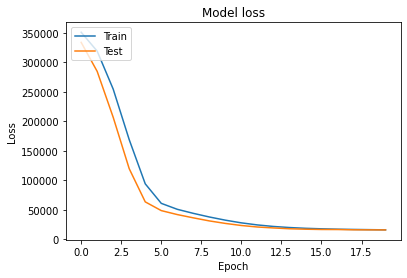

In [45]:
import matplotlib.pyplot as plt
 
for key in history.history:
  print(key)

def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['mae'])
  plt.plot(history.history['val_mae'])
  plt.title('Model MAE')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
 
plot_history(history)

In [9]:
prediction = model.predict(test_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


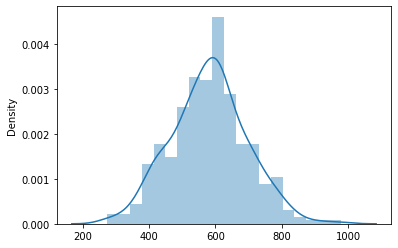

In [10]:
sns.distplot(prediction,bins=20)

ここまでが学習モデルの定義と学習

In [11]:
workLocations = ['東京都', '宮城県', '京都府', '北海道', '大阪府', '神奈川県', '愛知県', '沖縄県', '茨城県', '福岡県', '埼玉県', '広島県', '滋賀県', '愛媛県', '福井県', '兵庫県', '岡山県', '和歌山県', '香川県', '山口県', '静岡県', '群馬県', '石川県', '佐賀県', '千葉県', '秋田県', '熊本県', '大分県', '福島県', '徳島県', '長崎県', '島根県', '長野県']
languages = ['JavaScript', 'PHP', 'Ruby', 'Python2', 'Python3', 'Go言語', 'C', 'Spring', 'Laravel', 'React', 'Vue.js', 'Java', 'Visual Basic(VB.NET)', 'HTML+CSS', 'SQL', 'Kotlin', 'Swift', 'Django', 'TypeScript', 'Angular', 'HTML5+CSS3', 'C++', 'C＃', '.NET Framework', 'FuelPHP', 'Smarty', 'Android SDK', 'iOS SDK', 'Objective-C', 'Struts', 'Ruby on Rails', 'jQuery', 'Node.js', 'Symfony', 'Zend Framework', 'CakePHP', 'CodeIgniter', 'Flutter', 'Express', 'Next.js', 'Perl', 'React Native', 'Knockout.js', '自社フレームワーク', 'Scala', 'Rust', 'Haskell', 'Gin', 'Play Framework', 'Slim', 'Flask', 'Unity', 'Unreal Engine', 'Phalcon', 'Catalyst', 'ECMAScript', 'Java EE', 'Bootstrap', 'MATLAB', 'MyBatis', 'Nuxt.js', 'Bash', 'Sass', 'F#', 'OpenGL', 'Hibernate', 'COBOL', 'Riot.js', 'CUDA C/C++', 'Chainer', 'Caffe', 'TensorFlow', 'PL/SQL', 'Ethna', 'cocos2d', 'Seasar2', 'JSF', 'Xamarin', 'R言語', 'DirectX', 'Backbone.js', 'ABAP', 'iBATIS', 'Tornado', 'Lua', 'cocos2d-x', 'Echo', 'Haml', 'Ember.js', 'prototype.js', 'Titanium Mobile', 'Elixir', 'CoffeeScript', 'Pyramid', 'Dojo Toolkit', 'Revel', 'Sinatra', 'Camping', 'Waves', 'Pylons', 'ngCore', 'Foundation', 'ActionScript', 'Groovy', 'Erlang', 'AHDL', 'Verilog HDL', 'VHDL']
databases = ['MongoDB', 'MySQL', 'PostgreSQL', 'Oracle', 'DynamoDB', 'MicrosoftSQLServer', 'DB2', 'cassandra', 'SQLite', 'mSQL']
platforms = ['Amazon Web Service', 'Microsoft Azure', 'Google Cloud Platform', 'Firebase', 'さくらのクラウド', 'Salesforce', 'Alibaba', 'Google App Engine', 'Heroku', 'IBM Cloud(IBM Bluemix)', 'Netlify']
nessesaryConditionKeys = ['Web開発', 'C', 'Python2', 'Go言語', '何らかのシステム開発経験', 'Python3', 'JavaScript', 'HTML5+CSS3', 'インフラ設計', 'インフラ構築', 'TypeScript', 'C++', 'コンシューマーゲーム', '画像処理', 'C＃', 'プログラムコーディング', '.NETFramework', 'PHP', 'スマートフォンアプリ開発', 'Swift', 'Objective-C', 'Java', 'Ruby', 'Kotlin', 'SQL', 'システム設計', 'Flutter', 'Laravel', 'Perl', 'デスクトップアプリ開発', '要件定義', 'Scala', 'Haskell', 'Erlang', 'Scheme', 'プロジェクトマネジメント', 'RubyonRails', 'Node.js', '制御組込み系開発', 'コンシューマーゲーム開発', 'React', 'VisualBasic', 'Spring', 'AndroidSDK', 'ECMAScript', '汎用系開発業務', 'メンバー育成', 'VerilogHDL', 'VHDL', 'MATLAB', 'メンバーマネジメント', 'CTO／技術責任者', 'B2B', '自社製品/自社サービス', 'Vue.js', '研究開発', 'HTML+CSS', '業務システム/パッケージ', 'リサーチ、解析', 'データベースの設計、チューニング', 'ネットワーク設計', 'ラインマネジメント', 'Sass', 'Unity', '機械学習', 'Rust', 'チームの指針策定と牽引', '予実管理', 'セキュリティソフトウェア開発', 'テスト', '保守、追加開発', 'B2C', 'Bash', 'WEBサイト、CMS', 'COBOL', 'ソーシャルゲーム', 'Lua', 'Groovy', 'UnrealEngine', 'オンラインゲーム', 'SaaS', '金融/保険', 'スマートフォンアプリ', 'jQuery', '新規開発の企画', 'PL/SQL', 'Django', 'ReactNative', '受託開発', 'Next.js', 'Nuxt.js', '大規模', 'Angular', 'ハードウェア制御', '組込み', 'DirectX', 'OpenGL', 'R言語', 'Struts', 'ポータルサイト', 'AI', 'JavaEE', 'ミドルウェア', 'CakePHP', 'OS', 'ミドルウェア開発', 'ABAP', 'ActionScript', 'Haml', 'iOSSDK', 'Win/Macアプリケーション']

In [12]:
dfx = df.iloc[0:1,:]
dfx = dfx.drop(columns=['estimatedSalary'])
for j in range(274):
  dfx.iloc[0,j] = 0
dfx.head()

,東京都,宮城県,京都府,北海道,大阪府,神奈川県,愛知県,沖縄県,茨城県,福岡県,埼玉県,広島県,滋賀県,愛媛県,福井県,兵庫県,岡山県,和歌山県,香川県,山口県,静岡県,群馬県,石川県,佐賀県,千葉県,秋田県,熊本県,大分県,福島県,徳島県,長崎県,島根県,長野県,JavaScript,PHP,Ruby,Python2,Python3,Go言語,C,Spring,Laravel,React,Vue.js,Java,Visual Basic(VB.NET),HTML+CSS,SQL,Kotlin,Swift,...,nessesary-Sass,nessesary-Unity,nessesary-機械学習,nessesary-Rust,nessesary-チームの指針策定と牽引,nessesary-予実管理,nessesary-セキュリティソフトウェア開発,nessesary-テスト,nessesary-保守、追加開発,nessesary-B2C,nessesary-Bash,nessesary-WEBサイト、CMS,nessesary-COBOL,nessesary-ソーシャルゲーム,nessesary-Lua,nessesary-Groovy,nessesary-UnrealEngine,nessesary-オンラインゲーム,nessesary-SaaS,nessesary-金融/保険,nessesary-スマートフォンアプリ,nessesary-jQuery,nessesary-新規開発の企画,nessesary-PL/SQL,nessesary-Django,nessesary-ReactNative,nessesary-受託開発,nessesary-Next.js,nessesary-Nuxt.js,nessesary-大規模,nessesary-Angular,nessesary-ハードウェア制御,nessesary-組込み,nessesary-DirectX,nessesary-OpenGL,nessesary-R言語,nessesary-Struts,nessesary-ポータルサイト,nessesary-AI,nessesary-JavaEE,nessesary-ミドルウェア,nessesary-CakePHP,nessesary-OS,nessesary-ミドルウェア開発,nessesary-ABAP,nessesary-ActionScript,nessesary-Haml,nessesary-iOSSDK,nessesary-Win/Macアプリケーション,rank
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
https://paiza.jp/career/job_offers/12744?from=list,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
prediction = model.predict(dfx)

In [14]:
print(prediction) #どこにも住んでいない何のスキルもない人の年収 [万円]

[[100.5156]]


In [47]:
dfy = dfx.copy()
#nessesaryCondition以外を適当に固定した場合
#rank S
dfy['rank'] = 0
print(model.predict(dfy))
conditionDict = {}
for i in nessesaryConditionKeys:
  dfz = dfy.copy()
  condStr = "nessesary-" + i
  dfz[condStr] = 2
  prediction = model.predict(dfz)
  #print(i+":{}".format(prediction))
  conditionDict[i] = prediction
sortedConditionDict = sorted(conditionDict.items(),key=lambda x:x[1])
print(sortedConditionDict)

locationDict = {}
for i in workLocations:
  dfw = dfy.copy()
  dfw[i] = 1
  prediction = model.predict(dfw)
  #print(i+":{}".format(prediction))
  locationDict[i] = prediction
sortedLocationDict = sorted(locationDict.items(),key=lambda x:x[1])
print(sortedLocationDict)

rankDict = {}
for i in range(0,6):
  dfRank = dfy.copy()
  dfRank['rank'] = i
  prediction = model.predict(dfRank)
  #print(i+":{}".format(prediction))
  rankDict[i] = prediction
sortedRankDict = sorted(rankDict.items(),key=lambda x:x[1])
print(sortedRankDict)

langDict = {}
for i in languages:
  dfLang = dfy.copy()
  dfLang[i] = 1
  prediction = model.predict(dfLang)
  langDict[i] = prediction
sortedLangDict = sorted(langDict.items(),key=lambda x:x[1])
print(sortedLangDict)

platDict = {}
for i in platforms:
  dfPlat = dfy.copy()
  dfPlat[i] = 1
  predictin = model.predict(dfPlat)
  platDict[i] = prediction
sortedPlatDict = sorted(platDict.items(),key=lambda x:x[1])
print(sortedPlatDict)

dbDict = {}
for i in databases:
  dfDb = dfy.copy()
  dfDb[i] = 1
  prediction = model.predict(dfDb)
  dbDict[i] = prediction
sortedDbDict = sorted(dbDict.items(),key=lambda x:x[1])
print(sortedDbDict)

[[100.5156]]
[('受託開発', array([[60.162273]], dtype=float32)), ('保守、追加開発', array([[72.74771]], dtype=float32)), ('プログラムコーディング', array([[78.7739]], dtype=float32)), ('Ruby', array([[79.282486]], dtype=float32)), ('Rust', array([[79.61185]], dtype=float32)), ('B2C', array([[81.63348]], dtype=float32)), ('オンラインゲーム', array([[83.55039]], dtype=float32)), ('JavaScript', array([[83.60735]], dtype=float32)), ('CakePHP', array([[85.30929]], dtype=float32)), ('予実管理', array([[85.66403]], dtype=float32)), ('Win/Macアプリケーション', array([[85.70576]], dtype=float32)), ('Objective-C', array([[86.27679]], dtype=float32)), ('VHDL', array([[86.47551]], dtype=float32)), ('ActionScript', array([[87.569405]], dtype=float32)), ('ECMAScript', array([[87.6361]], dtype=float32)), ('Angular', array([[87.74471]], dtype=float32)), ('ポータルサイト', array([[88.04987]], dtype=float32)), ('HTML5+CSS3', array([[89.11016]], dtype=float32)), ('PHP', array([[89.59139]], dtype=float32)), ('コンシューマーゲーム開発', array([[89.67625]], dtype=flo

In [64]:
#paiza rank が Sで勤務地が東京都、何らかのシステム開発経験が1年未満、機械学習がわかる
dfYou = dfy.copy()
dfYou['rank'] = 5
dfYou['東京都'] = 1
yourCondition = "nessesary-" + "何らかのシステム開発経験"
dfYou[yourCondition] = 1
#yourCondition = "nessesary-" + "Web開発"
#dfYou[yourCondition] = 2
dfYou['Python3'] = 1
dfYou['JavaScript'] = 1
dfYou['Vue.js'] = 1
dfYou['Amazon Web Service'] = 1
dfYou['Django'] = 1
prediction = model.predict(dfYou)
print(prediction)

[[701.84344]]
